In [1]:
import torch
from torch import nn
import torch.nn as nn
from d2l import torch as d2l

In [2]:
def init_cnn(module):  #@save
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)
        
class LeNetMaximumRL(d2l.Classifier):  #@save
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))

In [3]:
model = LeNetMaximumRL()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
ReLU output shape:	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
ReLU output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
ReLU output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


/usr/local/miniconda3/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


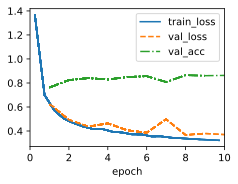

In [4]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNetMaximumRL(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [5]:
class LeNetMaximumRL(d2l.Classifier):
    def __init__(self, convs, linears, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        layers = []
        for conv in convs:
            layers.append(nn.LazyConv2d(conv[0], kernel_size=conv[1],
                                        padding=conv[2]))
            layers.append(nn.ReLU())
            layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.Flatten())
        for linear in linears:
            layers.append(nn.LazyLinear(linear))
            layers.append(nn.ReLU())
        layers.append(nn.LazyLinear(num_classes))
        self.net = nn.Sequential(*layers)

a. Adjust the convolution kernel size. 

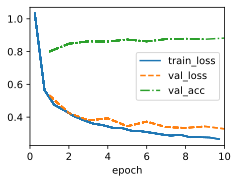

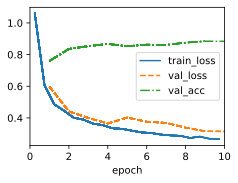

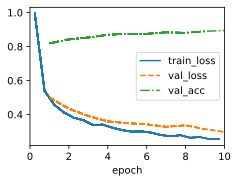

In [6]:
convs_list = [[[6,11,5],[16,11,0]],[[6,5,2],[16,5,0]],[[6,3,1],[16,3,0]]]
acc_list = []
for convs in convs_list:
    hparams = {'convs':convs, 'linears':[120,84]}
    model = LeNetMaximumRL(**hparams)
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
    acc_list.append(model.accuracy(y_hat,data.val.targets).item())

b. Adjust the number of convolution layers

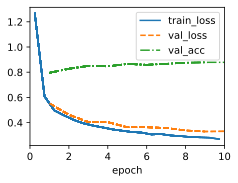

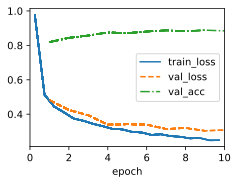

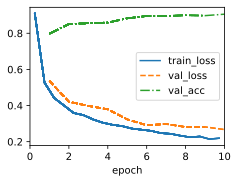

In [7]:
convs_list = [[[6,5,2],[16,5,2],[32,5,0]],[[6,5,2],[16,5,0]],[[64,5,0]]]
acc_list = []
for convs in convs_list:
    hparams = {'convs':convs, 'linears':[120,84]}
    model = LeNetMaximumRL(**hparams)
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
    acc_list.append(model.accuracy(y_hat,data.val.targets).item())

c. Adjust the number of fully connected layers 

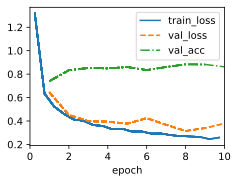

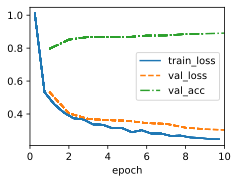

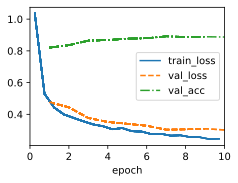

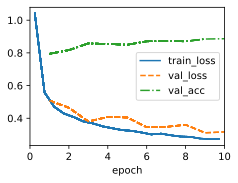

In [8]:
linears_list = [[256,128,64,32,16],[256,128],[120,84],[64,32]]
acc_list = []
for linears in linears_list:
    hparams = {'convs':[[6,5,2],[16,5,0]], 'linears':linears}
    model = LeNetMaximumRL(**hparams)
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
    acc_list.append(model.accuracy(y_hat,data.val.targets).item())

d. Adjust the learning rates, add batch normalization and other training details(e.g., initialization and number of epochs). 

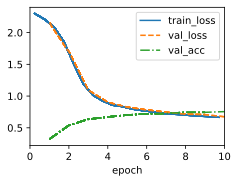

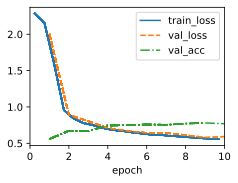

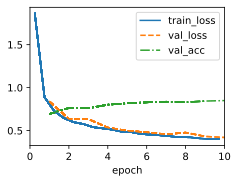

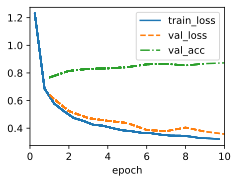

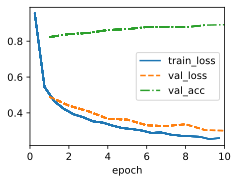

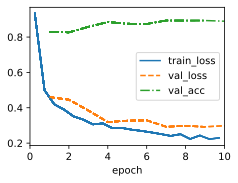

In [9]:
lr_list = [0.001,0.003,0.01,0.03,0.1,0.3]
acc_list = []
for lr in lr_list:
    batch_norm = nn.BatchNorm2d(convs[0][0])
    hparams = {'convs':[[6,5,2],[16,5,0]], 'linears':[120,84],'lr':lr}
    model = LeNetMaximumRL(**hparams)
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
    acc_list.append(model.accuracy(y_hat,data.val.targets).item())